<center><img src="https://www.mindinventory.com/blog/wp-content/uploads/2019/04/python-development-1200x500.png" width="1000"></center>

# Programa de Especialización en Python

## Tema 4. Métodos jerárquicos: caso práctico

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

In [1]:
from IPython.display import Image
%matplotlib inline

#### Leer SPSS

In [5]:
#pip install pyreadstat

In [2]:
import pandas as pd

In [13]:
#df =pd.read_spss('D:/Python/1. Nivel I/3/datos/distritos.sav')

In [3]:
import pyreadstat

In [4]:
filesav = 'D:/Python/2. Nivel II/2/datos/distritos.sav'
df, meta = pyreadstat.read_sav(filesav )

- distrito: nombre del distrito
- ocu_vivi: hogares en cada vivienda
- pobpjov: % de población en pueblos jóvenes
- sinelect: % de población sin electricidad
- sinagua: % de población sin agua
- pea1619: PEA entre 16 y 19 años
- pocprin: % de población de 6-19 con primaria completa
- peam 15: PEA menores de 15 años

In [5]:
df.head()

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15
0,Ate,1.15,5.3,27.60,51.10,3.9,1.1,63.48
1,Barranco,1.09,4.5,1.59,8.32,0.8,3.9,33.48
2,Breña,1.08,4.4,2.20,23.15,0.9,4.0,37.89
3,Carabayllo,1.10,5.1,30.13,38.09,4.5,12.6,63.65
4,Comas,1.20,5.9,10.92,24.27,3.8,9.4,60.37


In [6]:
# Clustering Jerárquico

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
X = df.iloc[:, 1:].values

In [8]:
X

array([[ 1.15,  5.3 , 27.6 , 51.1 ,  3.9 ,  1.1 , 63.48],
       [ 1.09,  4.5 ,  1.59,  8.32,  0.8 ,  3.9 , 33.48],
       [ 1.08,  4.4 ,  2.2 , 23.15,  0.9 ,  4.  , 37.89],
       [ 1.1 ,  5.1 , 30.13, 38.09,  4.5 , 12.6 , 63.65],
       [ 1.2 ,  5.9 , 10.92, 24.27,  3.8 ,  9.4 , 60.37],
       [ 1.15,  5.5 , 16.77, 37.11,  3.2 , 10.6 , 18.78],
       [ 1.22,  6.  , 16.42, 41.16,  4.5 , 13.5 , 55.84],
       [ 1.19,  5.9 ,  9.61, 21.58,  4.  , 10.5 , 60.16],
       [ 1.03,  4.2 ,  0.57, 14.78,  0.3 ,  3.1 , 23.52],
       [ 1.06,  4.7 ,  3.09, 25.79,  1.7 ,  7.8 , 49.21],
       [ 1.1 ,  4.6 ,  4.55, 26.  ,  1.7 ,  6.6 , 46.66],
       [ 1.03,  4.1 ,  1.14, 20.22,  0.5 ,  3.6 , 29.42],
       [ 1.11,  5.1 , 30.25, 46.18,  2.  ,  6.7 , 52.8 ],
       [ 1.1 ,  5.2 , 32.93, 65.76,  5.4 , 14.4 , 60.66],
       [ 1.08,  4.5 ,  1.41, 15.16,  0.7 ,  4.1 , 28.99],
       [ 1.09,  4.7 ,  1.24, 13.02,  0.5 ,  3.9 , 26.71],
       [ 1.03,  3.7 ,  0.67, 14.75,  0.2 ,  4.  , 22.45],
       [ 1.12,

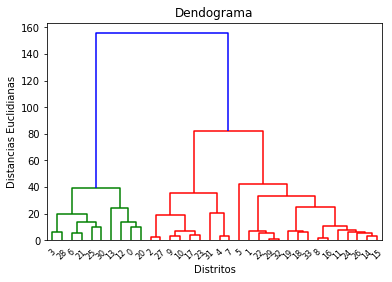

In [9]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Distritos')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [10]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

In [11]:
y_hc

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

**affinity:** por defecto es "euclidean". Puede adoptar: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, o “precomputed”.

Si el enlace es "ward", solo se acepta "euclidian". Si está "precomputed", se necesita una matriz de distancia (en lugar de una matriz de similitud) como entrada para el método de ajuste.

**linkage:** enlace predeterminado es ward.

Qué criterio de vinculación utilizar. El criterio de vinculación determina qué distancia usar entre conjuntos de observación. El algoritmo fusionará los pares de clúster que minimizan este criterio.

- Ward minimiza la varianza de los grupos que se fusionan.
- promedio (average) usa el promedio de las distancias de cada observación de los dos conjuntos.
- el enlace completo (complete) o máximo (maximum) utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
- single usa el mínimo de las distancias entre todas las observaciones de los dos conjuntos.

In [14]:
type(y_hc)

numpy.ndarray

In [15]:
cl= pd.DataFrame(y_hc, columns=["clúster_ward"])

In [16]:
distritos_new = pd.concat([df, cl], axis=1)
distritos_new

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15,clúster_ward
0,Ate,1.15,5.3,27.60,51.10,3.90,1.1,63.48,1
1,Barranco,1.09,4.5,1.59,8.32,0.80,3.9,33.48,0
2,Breña,1.08,4.4,2.20,23.15,0.90,4.0,37.89,0
3,Carabayllo,1.10,5.1,30.13,38.09,4.50,12.6,63.65,1
4,Comas,1.20,5.9,10.92,24.27,3.80,9.4,60.37,0
5,Chorrillos,1.15,5.5,16.77,37.11,3.20,10.6,18.78,0
6,Agustino,1.22,6.0,16.42,41.16,4.50,13.5,55.84,1
7,Independencia,1.19,5.9,9.61,21.58,4.00,10.5,60.16,0
8,Jesús María,1.03,4.2,0.57,14.78,0.30,3.1,23.52,0
9,La Victoria,1.06,4.7,3.09,25.79,1.70,7.8,49.21,0


#### Predicción de agrupamiento

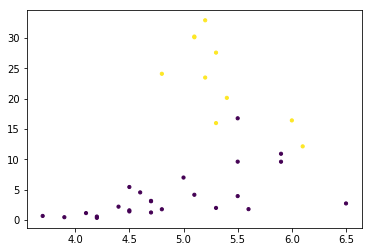

In [17]:
agg_clust = AgglomerativeClustering(n_clusters=2)
agg_clust
assigned_clust = agg_clust.fit_predict(X)
plt.scatter(X[:, 1], X[:, 2], c = assigned_clust, s = 10);

En el plot se puede apreciar que el algoritmo funcionó bastante bien. Se muestran algunos puntos que aparentemente se encuentran mal agrupados, pero los que se muestran así parecen bastante razonables, ya que están muy cerca de otros grupos.

#### Número óptimo de clúster

El coeficiente de silueta se calcula utilizando la distancia media dentro del grupo ( a) y la distancia media más cercana al grupo ( b) para cada muestra.

El mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican grupos superpuestos. Los valores negativos generalmente indican que se ha asignado una muestra al grupo incorrecto, ya que un grupo diferente es más similar.

In [43]:
from sklearn.metrics import euclidean_distances, silhouette_score

Text(0.5, 1.0, 'Silouette para data distritos')

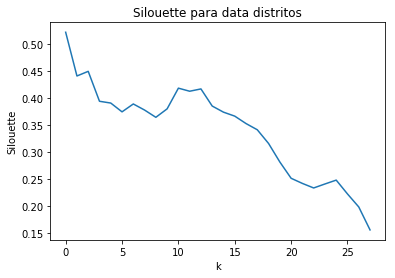

In [65]:
s = []

for n_clusters in range(2,30):
    hc = AgglomerativeClustering(n_clusters = n_clusters, 
                             affinity = 'euclidean', 
                             linkage = 'ward')
    hc.fit(X)

    labels = hc.fit_predict(X)
    #centroids = kmeans.cluster_centers_

    s.append(silhouette_score(X, hc.fit_predict(X)))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette para data distritos")
#sns.despine()

#### Ejercicio: índice democracias

La Unidad de Inteligencia de The Economist (EIU, por sus siglas en inglés) publica desde 2006 el Índice de Democracia, una rigurosa y reconocida clasificación que pretende determinar con base en un estudio, el nivel y la calidad de la democracia en 165 estados independientes y dos territorios. Este índice se basa en cinco categorías como indicadores fundamentales: proceso electoral y pluralismo (ppelec); libertades civiles (libciv); funcionamiento del gobierno (fdelgob); participación política (partpk); y cultura política (cultpk). De acuerdo con los resultados obtenidos en su edición de 2010 (DATA CONSULTADA), se clasifica a cada país como “democracia completa”, “democracia defectuosa”, “régimen híbrido” o “régimen autoritario”.

Nosotros tomamos la referente países de latinoamérica para realizar un análisis de conglomerados que nos permita agrupar a nuestros países en función a los indicadores medidos.


Realizar:

1. Data Frame donde se muestre la data incial y la etiqueta de clúster teniendo en cuenta como enlace "Ward", "average" y "complete". Cosiderar distancia coseno para "average" y "complete".
2. Número óptimo de clúster para cada una de las funciones de enlace.
3. Realizando un análisis de componentes principales, visualizar las etiquetas predichas.
4. Teniendo en cuenta el enlace "ward" realizar un análisis clúster aglomerativo de k = 4 (k criterio de experto).